In [133]:
# Reading in the initial data

import pandas as pd

weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [134]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.47,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-25,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,4.70,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-01-26,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,2.68,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [135]:
# Simplify our data and remove many of the unnecessary columns.
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX","TMIN"]].copy()

In [136]:
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max","temp_min"]

In [137]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-01-24,0.0,NaN,NaN,60.0,39.0
2022-01-25,0.0,NaN,NaN,57.0,43.0
2022-01-26,0.0,NaN,NaN,57.0,41.0


In [138]:
# Handle Missing Values
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.016668
snow          0.324990
snow_depth    0.317634
temp_max      0.000534
temp_min      0.000593
dtype: float64

In [139]:
core_weather["snow"].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [140]:
# the snow variable does not provide useful information to the ML algorithm to work with. We removed it
del core_weather["snow"]

In [141]:
core_weather["snow_depth"].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [142]:
# Same happens with snow_depth
del core_weather["snow_depth"]

In [143]:
# For precipitations
core_weather["precip"].value_counts()

0.00    13664
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.19        1
1.88        1
2.39        1
1.59        1
2.37        1
Name: precip, Length: 176, dtype: int64

In [144]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [145]:
# Strategy: Replace Missing Values with zero
core_weather["precip"] = core_weather["precip"].fillna(0)

In [146]:
# Now with temperatures
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [147]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [148]:
# We use a fordward Fill with temperature
core_weather = core_weather.fillna(method= "ffill")

In [149]:
core_weather

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


In [150]:
# Check the data types in the Database
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [151]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [152]:
# Change index to dates and time format
core_weather.index = pd.to_datetime(core_weather.index)

In [153]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

In [154]:
core_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=16859)

In [155]:
core_weather.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='DATE', length=16859)

In [156]:
core_weather.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
           dtype='int64', name='DATE', length=16859)

In [157]:
core_weather.apply(lambda x: (x==9999).sum()) 

precip      0
temp_max    0
temp_min    0
dtype: int64

# Data Analysis

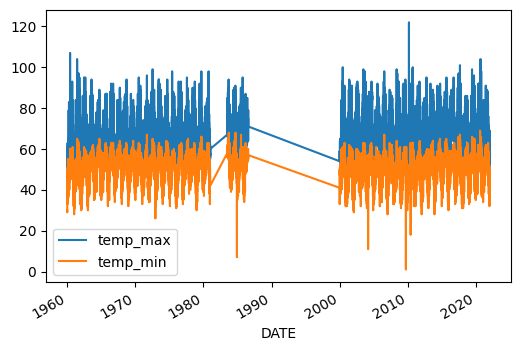

In [158]:
%matplotlib inline
core_weather[["temp_max", "temp_min"]].plot() 


In [159]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: DATE, dtype: int64

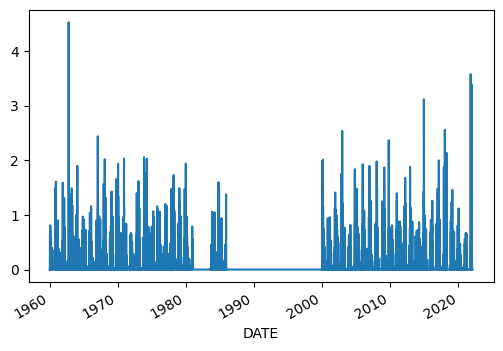

In [160]:
core_weather["precip"].plot()

In [161]:
# How much it rain per year
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: precip, dtype: float64

# Training an Initial Model

In [162]:
# Predict tomorrow's maximum temperature based on historical data
core_weather

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


In [163]:
# Create the target variable
core_weather["target"] = core_weather.shift(-1)["temp_max"]
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [164]:
# Tha last observation has a NaN, remove it
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


In [165]:
from sklearn.linear_model import Ridge

In [166]:
reg = Ridge(alpha=.1)

In [167]:
predictors = ["precip", "temp_max", "temp_min"]

In [168]:
# Split the data in train and test
train = core_weather.loc[:"2020-12-31"]

In [169]:
test = core_weather.loc["2021-01-01":]

In [170]:
# Fit the model to the training dataset
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [171]:
predictions = reg.predict(test[predictors])

# Evaluating the Model

In [172]:
# Measure the accuracy of the model
from sklearn.metrics import mean_absolute_error

In [173]:
# This means that, in average we're about 3.4 degrees off the actual temperature
mean_absolute_error(test["target"], predictions)

3.4111699434528306

In [174]:
combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis= 1)
combined.columns = ["actual", "predictions"]

In [175]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


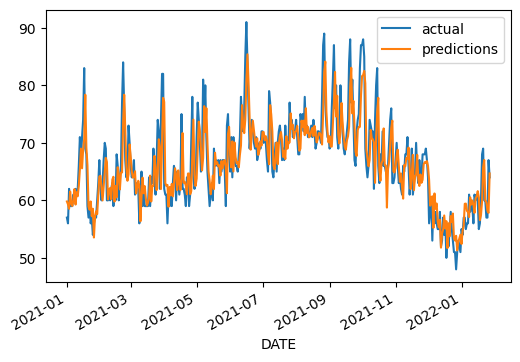

In [176]:
combined.plot()

In [177]:
# Coefficents of the regression model
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

# Building a Prediction Function

In [178]:
# Create a function to wrap up everything what we did before

def create_predictions(predictios, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis= 1)
    combined.columns = ["actual", "predictions"]
    return error, combined 

In [179]:
# What is the average temperature using the rolling mean method
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [180]:
# We can see that the first 30 days we have missing values because 30 days before are needed
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000
2022-01-24,0.0,60.0,39.0,57.0,57.066667
2022-01-25,0.0,57.0,43.0,57.0,57.200000


In [181]:
# Let's remove the missing values
core_weather = core_weather.iloc[30:,:].copy()

In [182]:
# Look at some ratios
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

In [183]:
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571
...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581


In [184]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min"]

In [185]:
error, combined = create_predictions(predictors, core_weather, reg)

In [186]:
# We reduced slightly the erro
error

3.3601297462076047

In [188]:
# Add more predictors
core_weather["monthly_avg"] = core_weather["temp_max"]. groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [189]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955


In [192]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min", "monthly_avg", "day_of_year_avg"]

In [193]:
core_weather["day_of_year_avg"] = core_weather["temp_max"]. groupby(core_weather.index.day).apply(lambda x: x.expanding(1).mean())

In [194]:
error, combined = create_predictions(predictors, core_weather, reg)

In [195]:
error

3.32856310969448

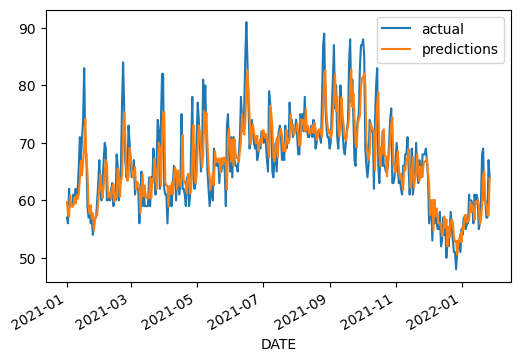

In [200]:
combined.plot()

In [199]:
reg.coef_

array([ -0.9250172 ,   0.4055283 ,   0.03462552,   0.34196489,
       -16.25382578,   0.05367172,   0.21084389,   0.02858951])

# Running Model Diagnosis

In [201]:
core_weather.corr()["target"]

precip            -0.205413
temp_max           0.821650
temp_min           0.596016
target             1.000000
month_max          0.686842
month_day_max     -0.421537
max_min            0.045228
monthly_avg        0.689805
day_of_year_avg    0.124058
Name: target, dtype: float64

In [206]:
# Look at the differences between the absolute actual values and the combined 
combined["diff"] = (combined["actual"]) - (combined["predictions"]).abs()
combined

,actual,predictions,diff
DATE,,,
2021-01-01,57.0,59.713948,-2.713948
2021-01-02,56.0,57.814409,-1.814409
2021-01-03,62.0,57.125118,4.874882
2021-01-04,59.0,60.868405,-1.868405
2021-01-05,59.0,59.012323,-0.012323
...,...,...,...
2022-01-23,60.0,59.347840,0.652160
2022-01-24,57.0,59.301298,-2.301298
2022-01-25,57.0,57.402859,-0.402859


In [207]:
# We can
combined.sort_values("diff", ascending = False).head()

,actual,predictions,diff
DATE,,,
2021-01-17,83.0,68.707515,14.292485
2021-05-07,81.0,67.758509,13.241491
2021-02-22,84.0,71.216668,12.783332
2021-02-21,77.0,64.396928,12.603072
2021-03-30,82.0,70.007375,11.992625
